In [4]:
import cv2                          # Para tratamento da imagem
import numpy as np                  # Para tipagem
import matplotlib.pyplot as plt     # Para plot no jupyter notebook
import math                         # Para calculo
import pandas as pd                  # Para transformação em csv

from Classes.Digitalizer import Digitalizer
from Classes.Graphic import GraphicTiff

In [5]:
digitalizer = Digitalizer()

In [6]:
"""
Pontos de interesse:

Cor de fora do gráfico (Bege): [216, 233, 236]

Cor de dentro do gráfico (Cinza): [192, 192, 192]

Cor da curva (Azul): [>240, <60, <60]

Quadrado do gráfico:

x: 57 a 602

y: 31 a 397

Distância entre pontos do eixo x: 54 pixels
"""

'\nPontos de interesse:\n\nCor de fora do gráfico (Bege): [216, 233, 236]\n\nCor de dentro do gráfico (Cinza): [192, 192, 192]\n\nCor da curva (Azul): [>240, <60, <60]\n\nQuadrado do gráfico:\n\nx: 57 a 602\n\ny: 31 a 397\n\nDistância entre pontos do eixo x: 54 pixels\n'

In [ ]:
image_name = ""
csv_output_name = ""
real_max_y = 99137 # tentar obter o maior valor de forma automática

In [4]:
graph_image = cv2.imread(image_name)

In [ ]:
# Altura e largura de onde está o gráfico
image_width = len(graph_image[0])
image_height = len(graph_image)

image_height, image_width

In [ ]:
# Coordenadas da matriz "gráfico"

graphic = GraphicTiff(borda=4,
                        x0=57, 
                        x1=602, 
                        y0=31, 
                        y1=397,
                        x_pixel_distance=54, 
                        x_diff=1, y_diff=20000)

In [7]:
# Eixo x


value_per_x_pixel = graphic.x_diff/graphic.x_pixel_distance

value_per_x_pixel

0.018518518518518517

In [8]:
# Eixo y
y_pixel_distance = digitalizer.find_yaxis_value_per_pixel(graph_image)


value_per_y_pixel = graphic.y_diff/y_pixel_distance

value_per_y_pixel

285.7142857142857

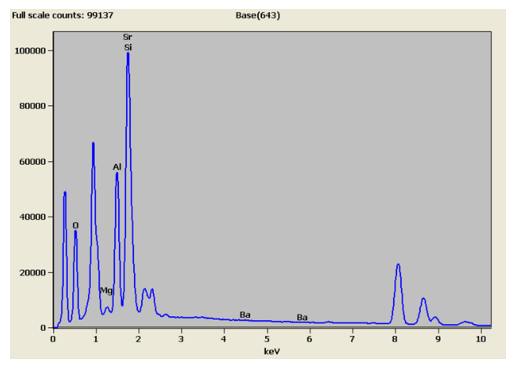

In [9]:
digitalizer.plot_image(graph_image)

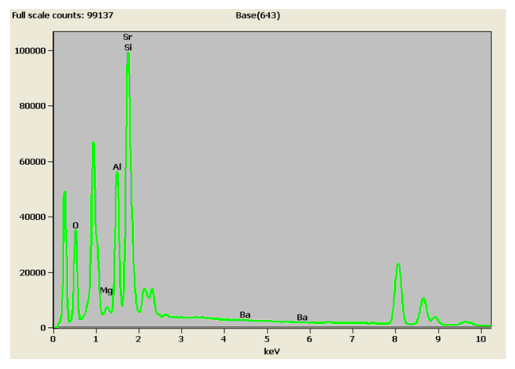

In [10]:
digitalizer.curve_check(graph_image, image_height, image_width)

In [11]:
x, y = digitalizer.get_csv_data(graph_image, graphic.x0, graphic.x1, graphic.y0, graphic.y1, value_per_x_pixel, value_per_y_pixel, x_interval=3)

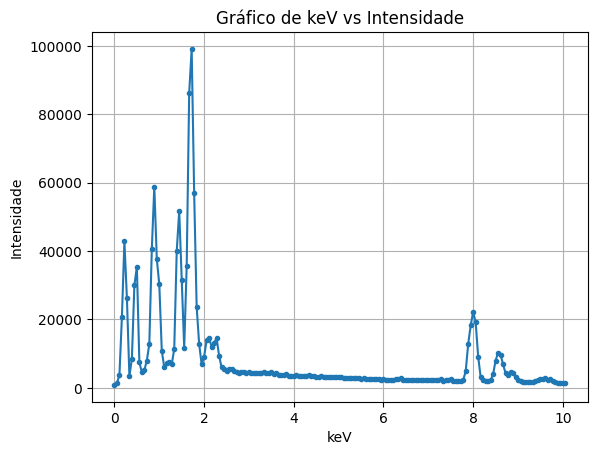

In [22]:
digitalizer.plot_graph(x, y)
dif_enter_y = max(y) - real_max_y # logica funciona apenas se max(y) for maior que o real_max+y
y = np.array(y)
y = y - dif_enter_y

In [14]:
max(y)

99137.0

In [18]:
# Criar um dataframe
df = pd.DataFrame({'x': x, 'y': y})

# Salvar o dataframe em csv
df.to_csv("output_from_tif.csv", index=False)
